In [8]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [9]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [10]:
#file_id = '1KjJc2BJbIiz94T3S4ObeNbZL0CwHXitJ'
#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('train.csv')

# Introduction & Data Cleaning by Weina

In [11]:
# In real Titanic's maiden voyage 10th-15th April 1912 the estimated dataset as bellows:

# Titanic's passengers numbered approximately 1,317 people: 
# 324 in First Class, 284 in Second Class, and 709 in Third Class. 
# Of these, 869 (66%) were male and 447 (34%) female. 
# There were 107 children aboard, the largest number of whom were in Third Class.
# The ship was considerably under capacity on her maiden voyage -
# Titanic’s actual capacity: accommodate 2,453 passengers—833 First Class, 614 Second Class, and 1,006 Third Class.

In [12]:
# Import Numpy and Pandas Packages

import numpy as np
import pandas as pd

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# In raw-data 'train.csv' Cabin has 687 null out of 891 sample, hence, suggesting drop this column for data analysis perspective

df = pd.read_csv('train.csv')
df.head(4)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

In [14]:
df.iloc[0:10, 1:6]

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   
5         0       3                                   Moran, Mr. James   
6         0       1                            McCarthy, Mr. Timothy J   
7         0       3                     Palsson, Master. Gosta Leonard   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  
0    male  22.0  
1  female  38.0  
2  female  26.0  
3  female  35.0  
4    male  35.0  
5    male   NaN  
6    male  54.0  
7    male   2.0  
8  female  27.0  
9  female  14.0

In [15]:
df.drop('Cabin', axis = 'columns',inplace=True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [17]:
# Fixing raw-data 'train.csv' Age 177 missing values
# Per Kaggle,  Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5?

#data.ffill('Age'(isnull()), 'Age' = 0, axis = 'columns')
#data.head(100) 

df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
# Q: 3-Dimensional Graphic Analysis, can we add/join side-table for some key comparable info?
# Firstly, Number of Passengers per Class per Sample-Size

# Data Analysis & Visualization by BOB

In [19]:
# Another way to treat missing values in Age:

try_1 = pd.read_csv('train.csv')
try_1.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [20]:
try_1.drop('Cabin',axis='columns', inplace=True)
try_1.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  
0      0  A/5 21171   7.2500        S  
1      0   PC 17599  71.2833        C

In [21]:
plt.figure(figsize=(15, 9))

sns.boxplot(x='Pclass',y='Age',data=try_1,palette='winter')


In [22]:
# From the boxplot, it is easy to find that the value of age will be greater in the first class.
# Let's guess some relevant values for each class 
# Setup the age for 1st, 2nd, 3rd class are 37, 29, 23, which is the mean value of each class.

In [23]:
def deal_with_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 23

    else:
        return Age

In [24]:
try_1.Age = try_1[['Age','Pclass']].apply(deal_with_age, axis=1)

In [25]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
try_1['Age'].describe()

count    891.000000
mean      28.913771
std       13.307723
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('train.csv')
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [30]:
# The function to calculate the percentage of people in each class:


def calc_perc_survived(pclass):
  
    total_ppl_by_class = df[ df['Pclass'] == pclass].shape[0]

    class_survived = df[ (df['Pclass'] == pclass) & (df['Survived'] == 1)].shape[0]

    answer = round(class_survived / total_ppl_by_class, 4)

    print('Percentage of people who survived in {} Class ={}'.format(pclass, answer))
    
    return answer

Percentage of people who survived in 1 Class =0.6296
Percentage of people who survived in 2 Class =0.4728
Percentage of people who survived in 3 Class =0.2424


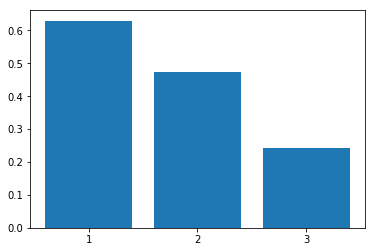

In [31]:
# To build the new list to store the value
mylist = []

# Use for loop to calculate class 1 to 3:
for i in range(1,4):
    mylist.append(calc_perc_survived(i))


#plot the percentage of survived people in each class:
plt.bar(['1','2','3'], mylist) 
plt.show()

In [32]:
# The way to use groupby to see how many people in each class suvivied or not:

df [ ['Pclass', 'Survived', 'PassengerId']].groupby(['Survived','Pclass']).count()

PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119

In [33]:
df [ ['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass','Survived']).count()

PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

Females Survived: 0.7420382165605095
Males Survived: 0.18890814558058924 



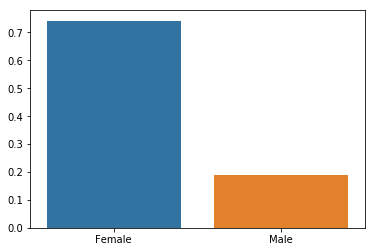

In [34]:
# To calculate the percentage of women and men survived

total_females = df[ df['Sex'] == 'female' ].shape[0]
survived_females = df[( df['Sex'] == 'female') & (df['Survived'] == 1) ].shape[0]
print('Females Survived: {}'.format(survived_females / total_females))

total_males = df[ df['Sex'] == 'male' ].shape[0]
survived_males = df[( df['Sex'] == 'male') & (df['Survived'] == 1) ].shape[0]
print('Males Survived: {} \n'.format(survived_males / total_males))


#plot the result using searborn;
sns.barplot(x=['Female', 'Male'], y=[survived_females / total_females, survived_males / total_males], );

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


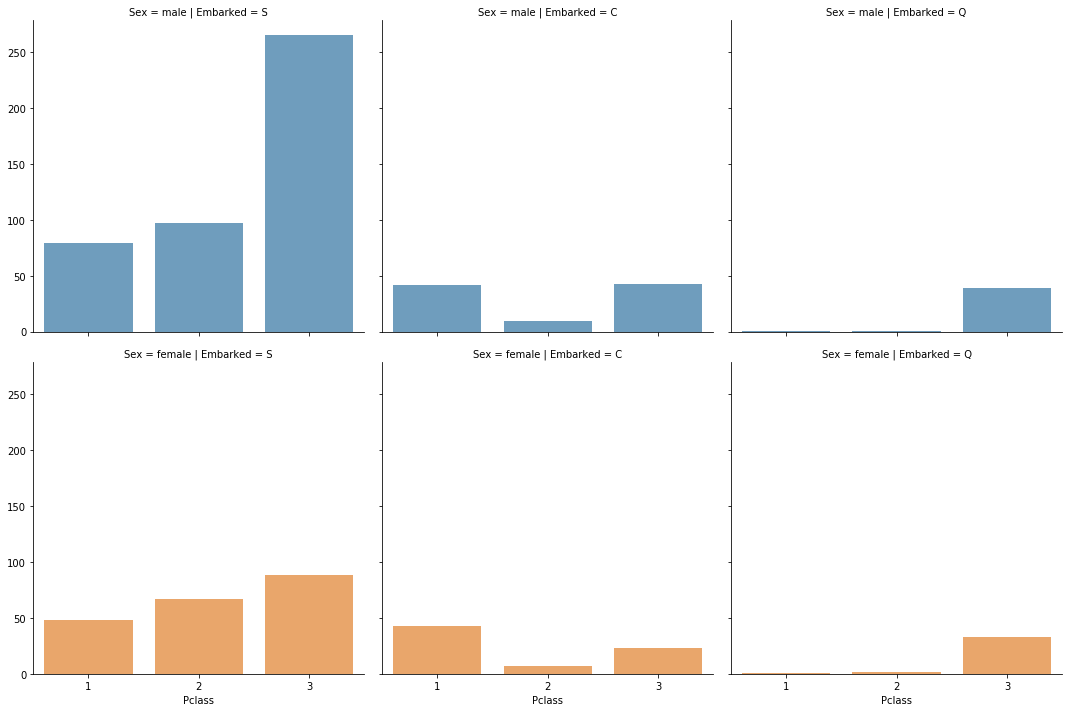

In [35]:
vis_1 = sns.FacetGrid(df,row='Sex',col='Embarked',hue='Sex',height=5);
vis_1.map(sns.countplot,'Pclass', alpha=0.7);



# Data Analysis & Visualization by Sarita

In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [37]:
df.shape 

(891, 11)

In [38]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [39]:
df.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

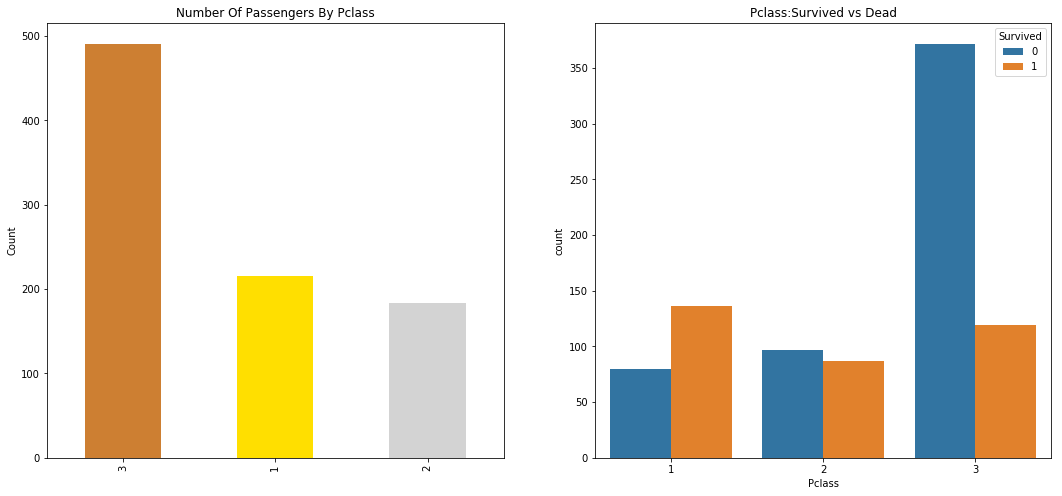

In [40]:
# EDA


f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [41]:
#Here we can clearly see that Passenegers of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low.

#For Pclass 1 surviving % is higher, for Pclass2 is also better than Pclass 3. So money and status are important factors influencing the survivor rate. 

#Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with gender and Pclass Together.

In [42]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [43]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


In [44]:
###
#We use FactorPlot in this case, because they make the seperation of categorical values easy.

#Looking the Cross Tab and FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

#It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

#Looks like Pclass is also an important feature. Lets analyse other features.

In [45]:
# We should consider age for training
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [46]:
#Inference is that the most of the infants survived and the age group of survivors is in the range of 20-38

#Correlating numerical and ordinal features We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

#Observations.

#Pclass=3 had most passengers, however most did not survive. Infant passengers in Pclass=2 and Pclass=3 mostly survived. Most passengers in Pclass=1 survived. Pclass varies in terms of Age distribution of passengers. Decisions.

#Consider Pclass for model training.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


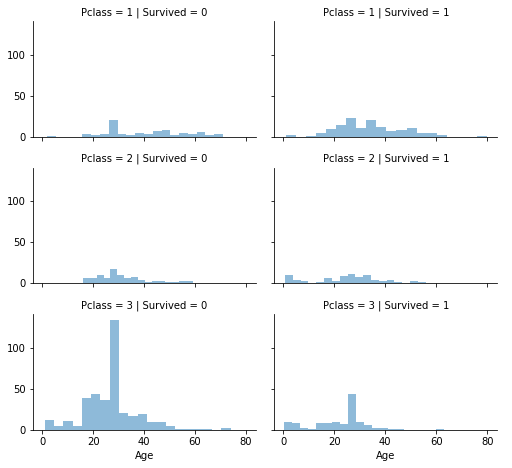

In [47]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [48]:
#Correlating categorical features
#Now we can correlate categorical features with our solution goal.

#Observations.

#Female passengers had much better survival rate than males.
#Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
#Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. 
#Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.
#Decisions.
#
#Add Sex feature to model training.
#Complete and add Embarked feature to model training.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


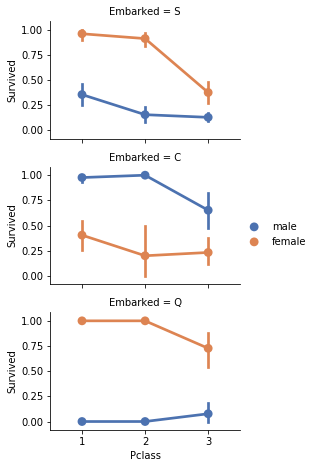

In [49]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [50]:
#Correlating categorical and numerical features
#We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).
#
#Observations.
#
#Higher fare paying passengers had better survival. 
#Port of embarkation correlates with survival rates. 
#

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


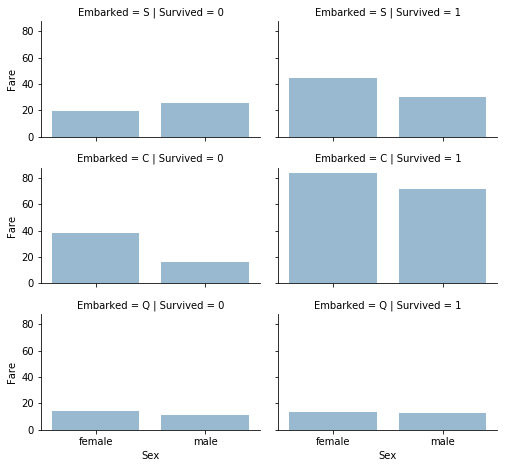

In [51]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6);
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);
grid.add_legend();

# Data Analysis & Visualization by Frank

In [71]:

#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ipython to enable ipy_table conduct pip install 
import ipy_table as tbl
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [72]:
survivors_data = df[df.Survived==True]
non_survivors_data =df[df.Survived==False]
#print(survivors_data.head())
#print(non_survivors_data.head())

In [73]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=age_labels)
print(df['age_group'].head())

0    20-29
1    30-39
2    20-29
3    30-39
4    30-39
Name: age_group, dtype: category
Categories (8, object): [0-9 < 10-19 < 20-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70-79]


In [74]:

table = pd.crosstab(df['Survived'],df['Sex'])
print(table)

Sex       female  male
Survived              
0             81   468
1            233   109


In [56]:
###  Which gender had a better chance of survival?
#
#In order to answer this question we need to look at how many males and females were on board and which gender had the highest survival rate.
#Hypothesis
#
#The hypothesis for this question is that the gender does impact the chances of survival
#
#H0 = Gender has no impact on survivability
#
#HA = Gender does impact the chances of survivabily
#
#Count of Survivors by Gender

In [75]:
def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

In [76]:

# calculate values for each survival status
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

Text(0.5, 1.0, '% of survivors by gender')

In [59]:

#The plots and proportions above show that there were a significant more males on board the Titanic compared to the number of females. Whilst the second plot (% of survivors by gender) shows that Females had a higher proportion (74.2%) of survivors compared to the proportion of males (18.9%). This shows that females had a greater rate of survival.

In [60]:
#As the P-Value is less than 0.05 the probability of that the age group will impact the chances of survival is high. Therefore I believe that we can reject the null hypothesis.

In [77]:
table = pd.crosstab([df['Survived']], df['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
table.make_table(results)

AttributeError: 'DataFrame' object has no attribute 'make_table'

In [62]:
# Which social class had a better chance of survival?

## Hypothesis

#The hypothesis for this question is that the social class does impact the chances of survival
#
#H0 = Social Class has no impact on survivability
#
#HA = Social Class does impact the chances of survivabily

In [63]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

Text(0.5, 1.0, '% of survivors by class')

In [64]:

#table = pd.crosstab([df['Survived']],df['Pclass'])
#chi2, p, dof, expected = stats.chi2_contingency(table.values)
#results = [
#    ['Item','Value'],
#    ['Chi-Square Test',chi2],
#    ['P-Value', p]
#]
#tbl.make_table(results)

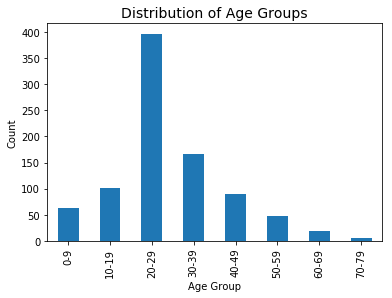

In [65]:

df.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [66]:
#Proportion of survivors by age group

print(df.groupby(['age_group']).Survived.mean())

age_group
0-9      0.612903
10-19    0.401961
20-29    0.324937
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64


In [67]:

# calculate values for each survival status
survivors_age_group = survivors_data.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data.groupby(['age_group']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(age_labels)))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=14)

KeyError: 'age_group'